# Quantum Phase Estimation

## The circuit

We have a goal: given a unitary operator $U$, we want to estimate $\theta$ from $U|\psi \rangle = e^{2\pi\theta}|\psi \rangle$.

Notice that in this case $|\psi \rangle$ is an eigenvector of eigenvalue $e^{2\pi\theta}$. Since $U$ is unitary, every eigenvalue has norm $1$.

We will use three qubits as *counting qubits*, and a fourth one as eigenstate of the unitary operator $T$.
We initialize the last one in $|1 \rangle$ by applying the $X$ gate.

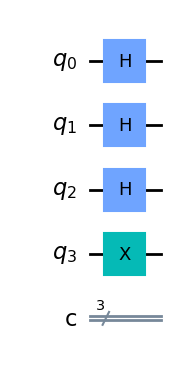

In [1]:
from qiskit import QuantumCircuit

qpe_circuit = QuantumCircuit(4, 3)
for qbit in range(3):
    qpe_circuit.h(qbit)
qpe_circuit.x(3)
qpe_circuit.draw(output='mpl')

Now we want to perform controlled unitary operations

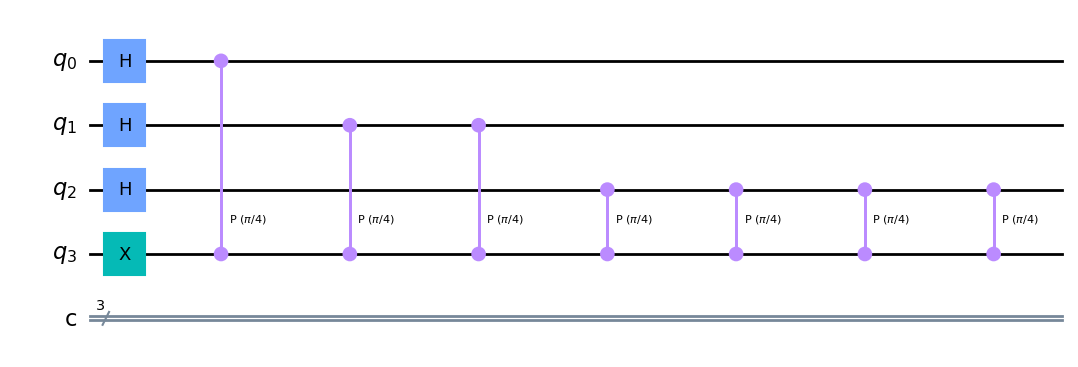

In [2]:
import numpy as np

repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe_circuit.cp(np.pi/4, counting_qubit, 3) # This is the Controlled U gate
    repetitions *= 2
qpe_circuit.draw(output='mpl')

Now we apply the **Inverse Quantum Fourier Transform** in order to convert the counting register state.

The code for the IQFT is:

In [3]:
def iqft(qCircuit, n):
    '''
    Apply the inverse quantum Fourier transform to the first n qubits in qCircuit
    '''
    for qubit in range(n//2):
        qCircuit.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qCircuit.cp(-np.pi/float(2**(j-m)), m, j)
        qCircuit.h(j)

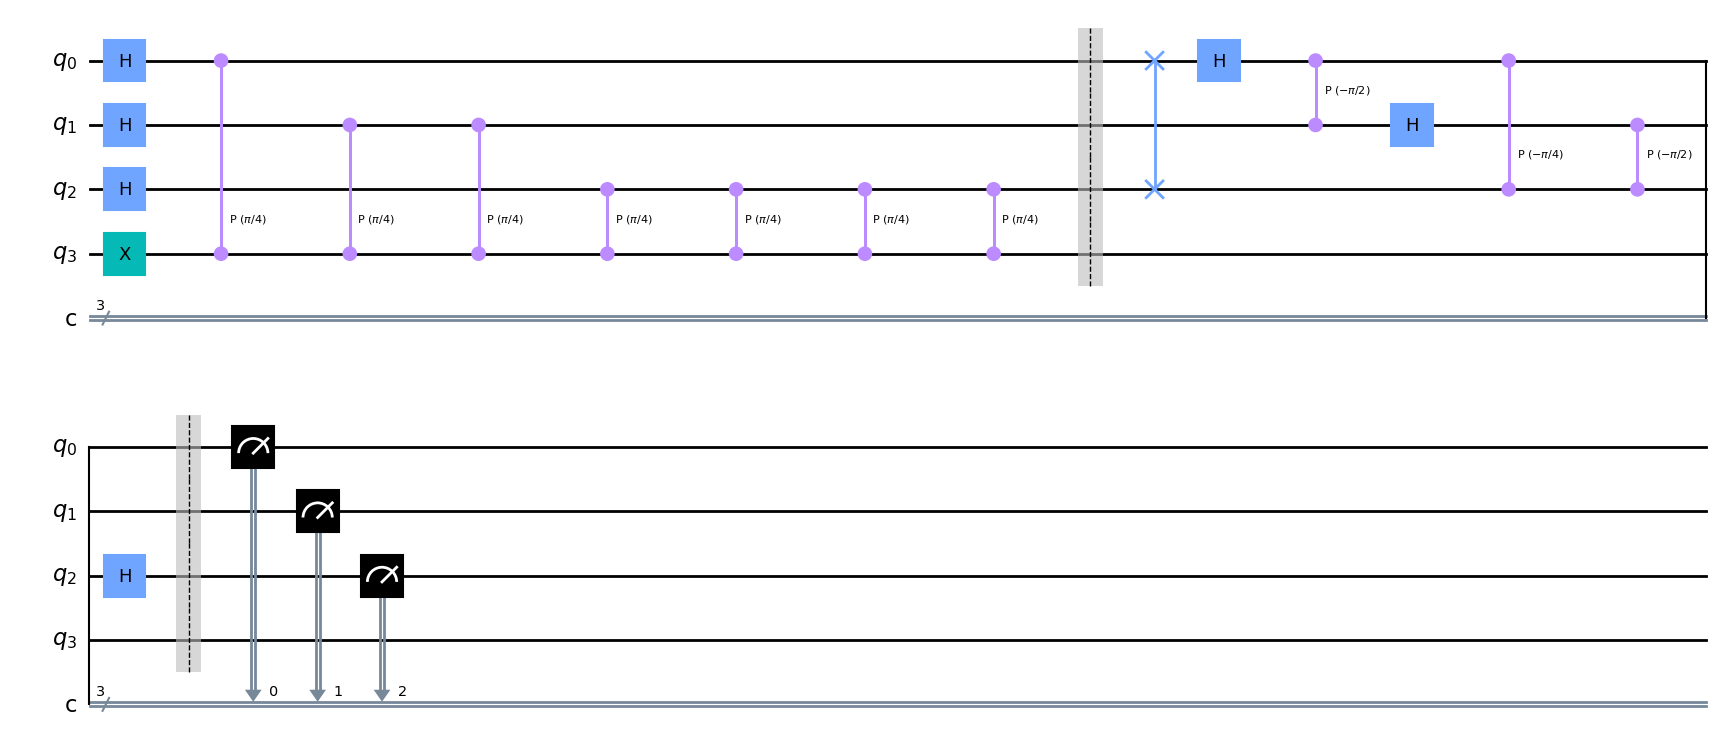

In [4]:
qpe_circuit.barrier()
iqft(qpe_circuit, 3)
qpe_circuit.barrier()

for n in range(3):
    qpe_circuit.measure(n,n)

qpe_circuit.draw(output='mpl')

## Simulate the IQFT

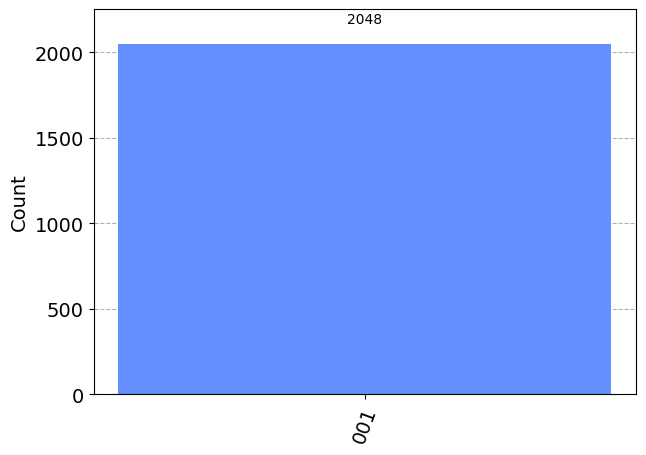

In [5]:
from qiskit import Aer, transpile
from qiskit.visualization import plot_histogram

simulator = Aer.get_backend('aer_simulator')
N = 2**11
t_qpe = transpile(qpe_circuit, simulator)

result = simulator.run(t_qpe, shots=N).result()
plot_histogram(result.get_counts())

Notice that we always get $(001)$ as result: it translates into decimal $1$.

In order to get $\theta$ we need to divide our result by $2^n$, i.e.
$$
\theta = \frac{1}{2^3} = \frac{1}{8}
$$
as expected.